<a href="https://colab.research.google.com/github/surya1307/hack24thon/blob/main/Hack24thon_lung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting severity of lung cancer with features like age, gender, alcohol use, genetic risk, smoking, etc etc

In [ ]:
# Importing Necessary Libraries

import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

In [ ]:
lung = pd.read_csv("/Users/godskid/Desktop/adv python/lung_cancer.csv")

In [ ]:
lung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     1000 non-null   int64  
 1   Patient Id                1000 non-null   object 
 2   Age                       1000 non-null   int64  
 3   Gender                    1000 non-null   int64  
 4   Air Pollution             1000 non-null   int64  
 5   Alcohol use               1000 non-null   int64  
 6   Dust Allergy              1000 non-null   int64  
 7   OccuPational Hazards      1000 non-null   int64  
 8   Genetic Risk              1000 non-null   int64  
 9   chronic Lung Disease      1000 non-null   int64  
 10  Balanced Diet             1000 non-null   int64  
 11  Obesity                   1000 non-null   int64  
 12  Smoking                   995 non-null    float64
 13  Passive Smoker            1000 non-null   int64  
 14  Chest Pai

In [ ]:
# Removing patient id thus Index Column refers to patient id
lung.drop("Patient Id", axis=1, inplace=True)

In [ ]:
# Cleaning feature names
lung.columns = lung.columns.str.strip()
lung.columns = lung.columns.str.lower()
lung.columns = lung.columns.str.replace(" ", "_")

In [ ]:
# Display Data After Cleaning
display(lung)

,index,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,...,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring,level
0,0,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,3,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,4,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,High
996,996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,High
997,997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
998,998,18,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
# Check For Null Values
lung.isnull().sum()

index                       0
age                         0
gender                      0
air_pollution               0
alcohol_use                 0
dust_allergy                0
occupational_hazards        0
genetic_risk                0
chronic_lung_disease        0
balanced_diet               0
obesity                     0
smoking                     5
passive_smoker              0
chest_pain                  0
coughing_of_blood           0
fatigue                     0
weight_loss                 0
shortness_of_breath         0
wheezing                    0
swallowing_difficulty       0
clubbing_of_finger_nails    0
frequent_cold               0
dry_cough                   0
snoring                     0
level                       0
dtype: int64

In [ ]:
from scipy import stats
from scipy.stats import norm, skew
lung['smoking'].skew()
#is fairly symmetrical as the skewness lies between -0.5 and 0.5. 
#Since the value is positive, the data is slightly skewed to the right— 
#the right tail is slightly longer than the left tail.

0.37698267042051525

In [ ]:
#data is numerical and skewed. Thus replacing with median
lung['smoking'].fillna(lung['smoking'].median(),inplace=True)

In [ ]:
print(lung.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     1000 non-null   int64  
 1   age                       1000 non-null   int64  
 2   gender                    1000 non-null   int64  
 3   air_pollution             1000 non-null   int64  
 4   alcohol_use               1000 non-null   int64  
 5   dust_allergy              1000 non-null   int64  
 6   occupational_hazards      1000 non-null   int64  
 7   genetic_risk              1000 non-null   int64  
 8   chronic_lung_disease      1000 non-null   int64  
 9   balanced_diet             1000 non-null   int64  
 10  obesity                   1000 non-null   int64  
 11  smoking                   1000 non-null   float64
 12  passive_smoker            1000 non-null   int64  
 13  chest_pain                1000 non-null   int64  
 14  coughing_

In [ ]:
# Labelling the target feature
lung["level"].replace({'High': 2, 'Medium': 1, 'Low': 0}, inplace=True)
print('Cancer Levels: ', lung['level'].unique())

Cancer Levels:  [0 1 2]


In [ ]:
lung.describe()

,index,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,...,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring,level
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000,1.062000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686,0.815365
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,1.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,2.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000,2.000000


In [ ]:
# Features
lung.columns

Index(['index', 'age', 'gender', 'air_pollution', 'alcohol_use',
       'dust_allergy', 'occupational_hazards', 'genetic_risk',
       'chronic_lung_disease', 'balanced_diet', 'obesity', 'smoking',
       'passive_smoker', 'chest_pain', 'coughing_of_blood', 'fatigue',
       'weight_loss', 'shortness_of_breath', 'wheezing',
       'swallowing_difficulty', 'clubbing_of_finger_nails', 'frequent_cold',
       'dry_cough', 'snoring', 'level'],
      dtype='object')

In [ ]:
# Consolidating Necessary features
cols1 = ['age', 'weight_loss', 'smoking']
cols2 = [ 'gender']
cols3 = [ 'air_pollution', 'alcohol_use', 'dust_allergy', 'smoking', 'chest_pain', 'fatigue']

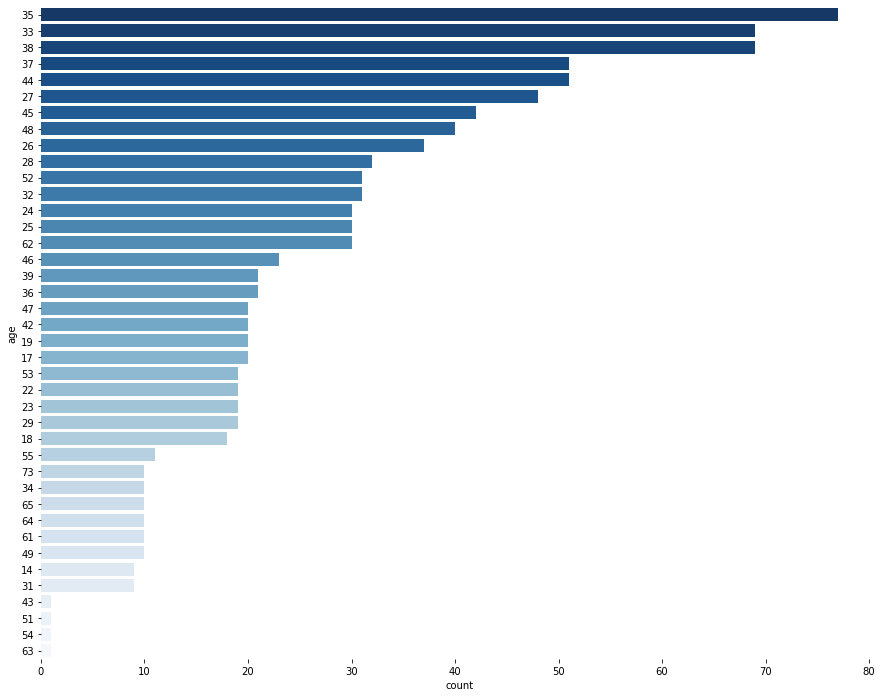

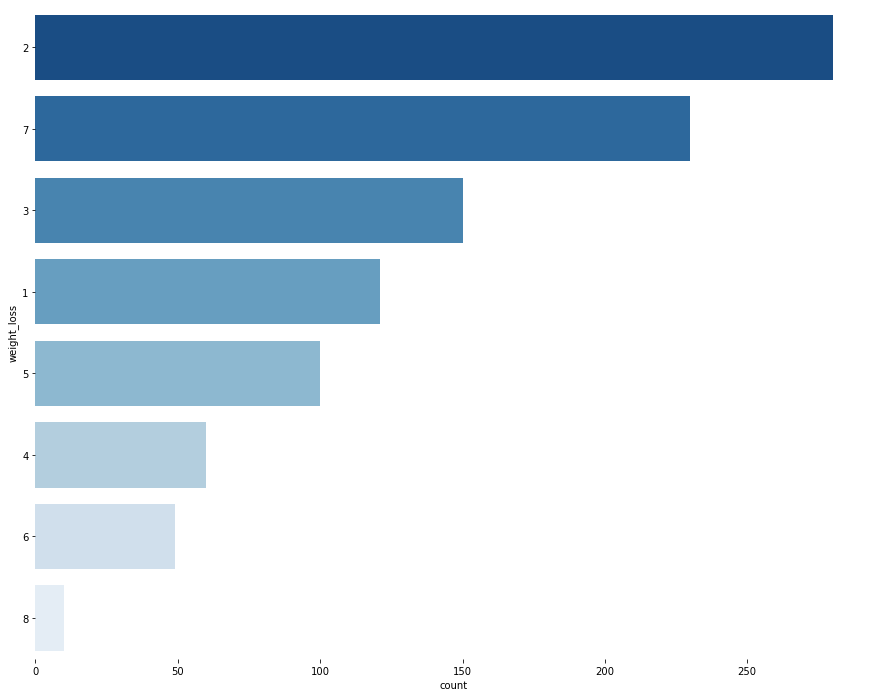

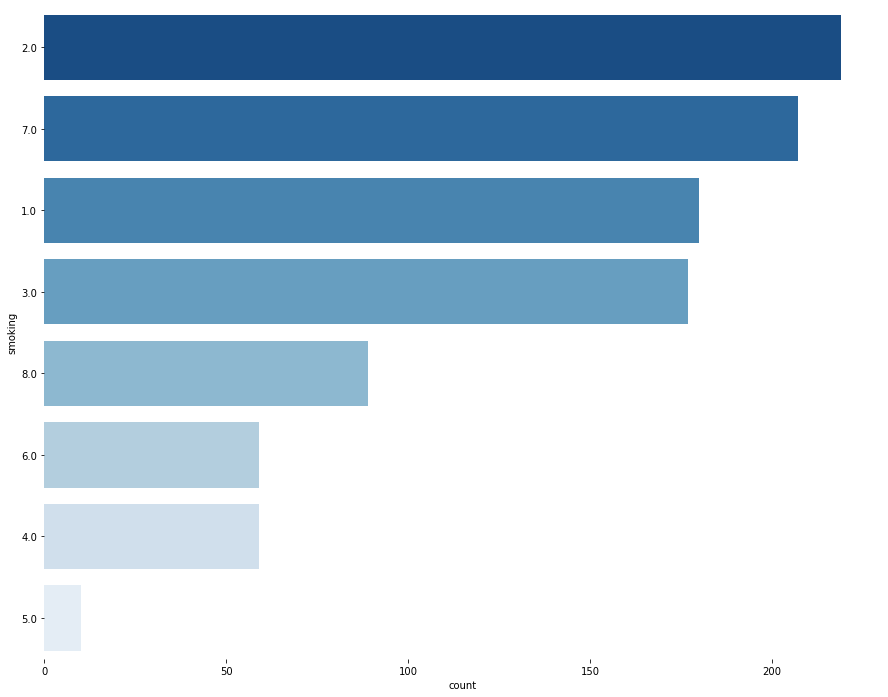

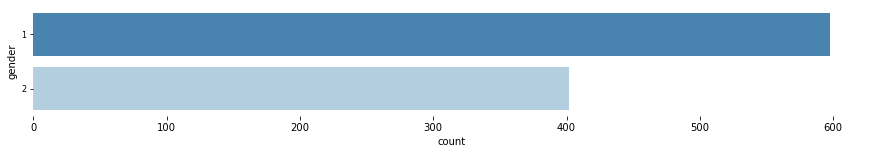

In [ ]:
#Presenting the countplots for categorical features
for i in cols1:
  fig, ax = plt.subplots(1,1, figsize=(15, 12))
  sns.countplot(y = lung[i],data=lung, order=lung[i].value_counts().index, palette='Blues_r')
  plt.ylabel(i)
  plt.yticks(fontsize=10)
  plt.box(False)
  plt.show()

# Gender
for i in cols2:
    fig, ax = plt.subplots(1,1, figsize=(15, 2))
    sns.countplot(y = lung[i],data=lung, order=lung[i].value_counts().index, palette='Blues_r')
    plt.ylabel(i)
    plt.yticks(fontsize=8)
    plt.box(False)
    plt.show()

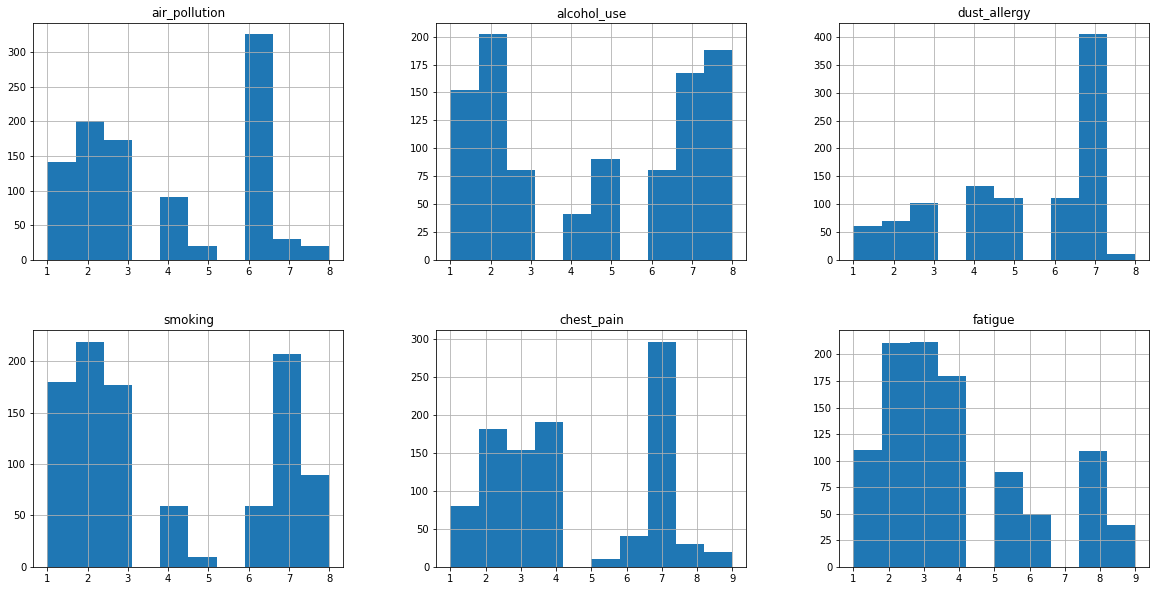

In [ ]:
# Histograms
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
ax = ax.flatten()
i = 0

for c in cols3:
    lung.hist(c, figsize=(4,4), ax=ax[i], label=f'{c}')
    i = i + 1;
plt.show()

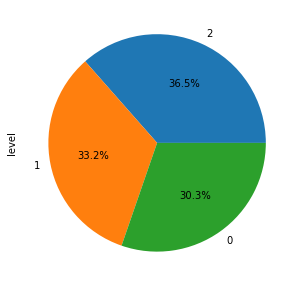

In [ ]:
 # Pie Chart
lung['level'].value_counts().plot(kind='pie', figsize=(5, 5), autopct='%1.1f%%')
plt.show()

Smoking and Label of Lung Cancer


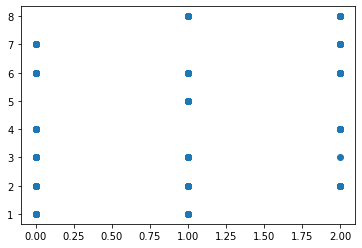

Air Polution and Label of Lung Cancer


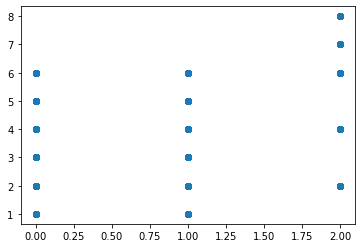

In [ ]:
# Scatter Plot

print('Smoking and Label of Lung Cancer')
plt.scatter(lung['level'], lung['smoking'])
plt.show()
print('Air Polution and Label of Lung Cancer')
plt.scatter(lung['level'], lung['air_pollution'])
plt.show()

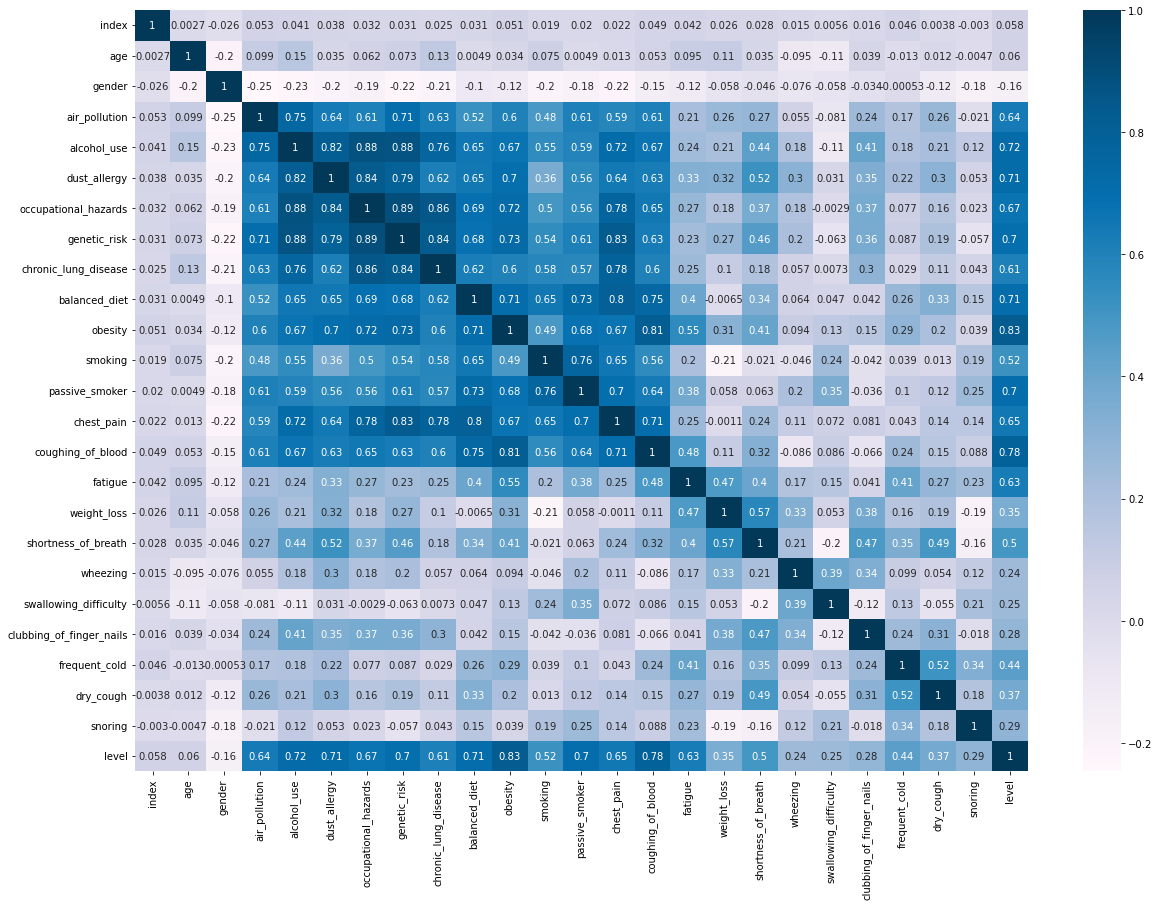

In [ ]:
# Heatmap
plt.figure(figsize=(20,14))
sns.heatmap(lung.corr(), annot=True, cmap=plt.cm.PuBu)
plt.show()

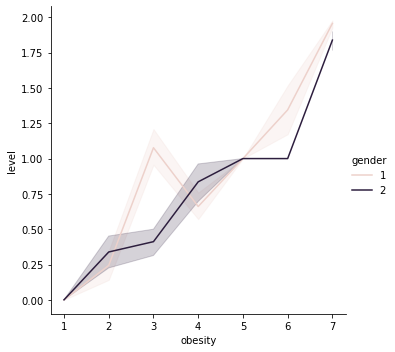

In [ ]:
sns.relplot(data=lung,x="obesity",y="level",hue="gender",kind="line")

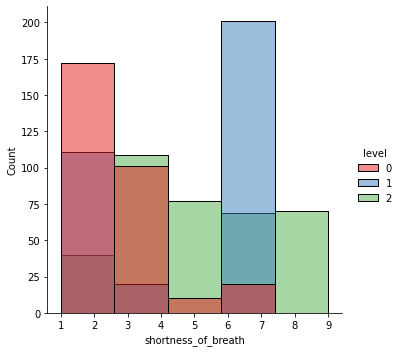

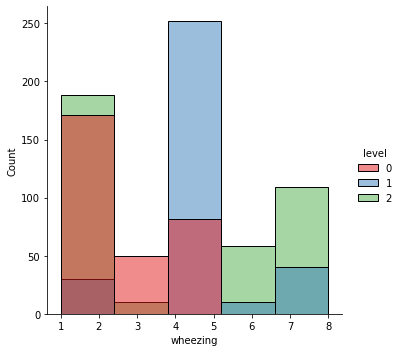

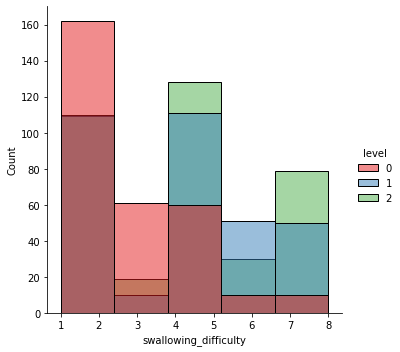

In [ ]:
sns.displot(data=lung,x='shortness_of_breath',hue='level',kde=False,bins=5,palette='Set1')
sns.displot(data=lung,x='wheezing',hue='level',kde=False,bins=5,palette='Set1')
sns.displot(data=lung,x='swallowing_difficulty',hue='level',kde=False,bins=5,palette='Set1')

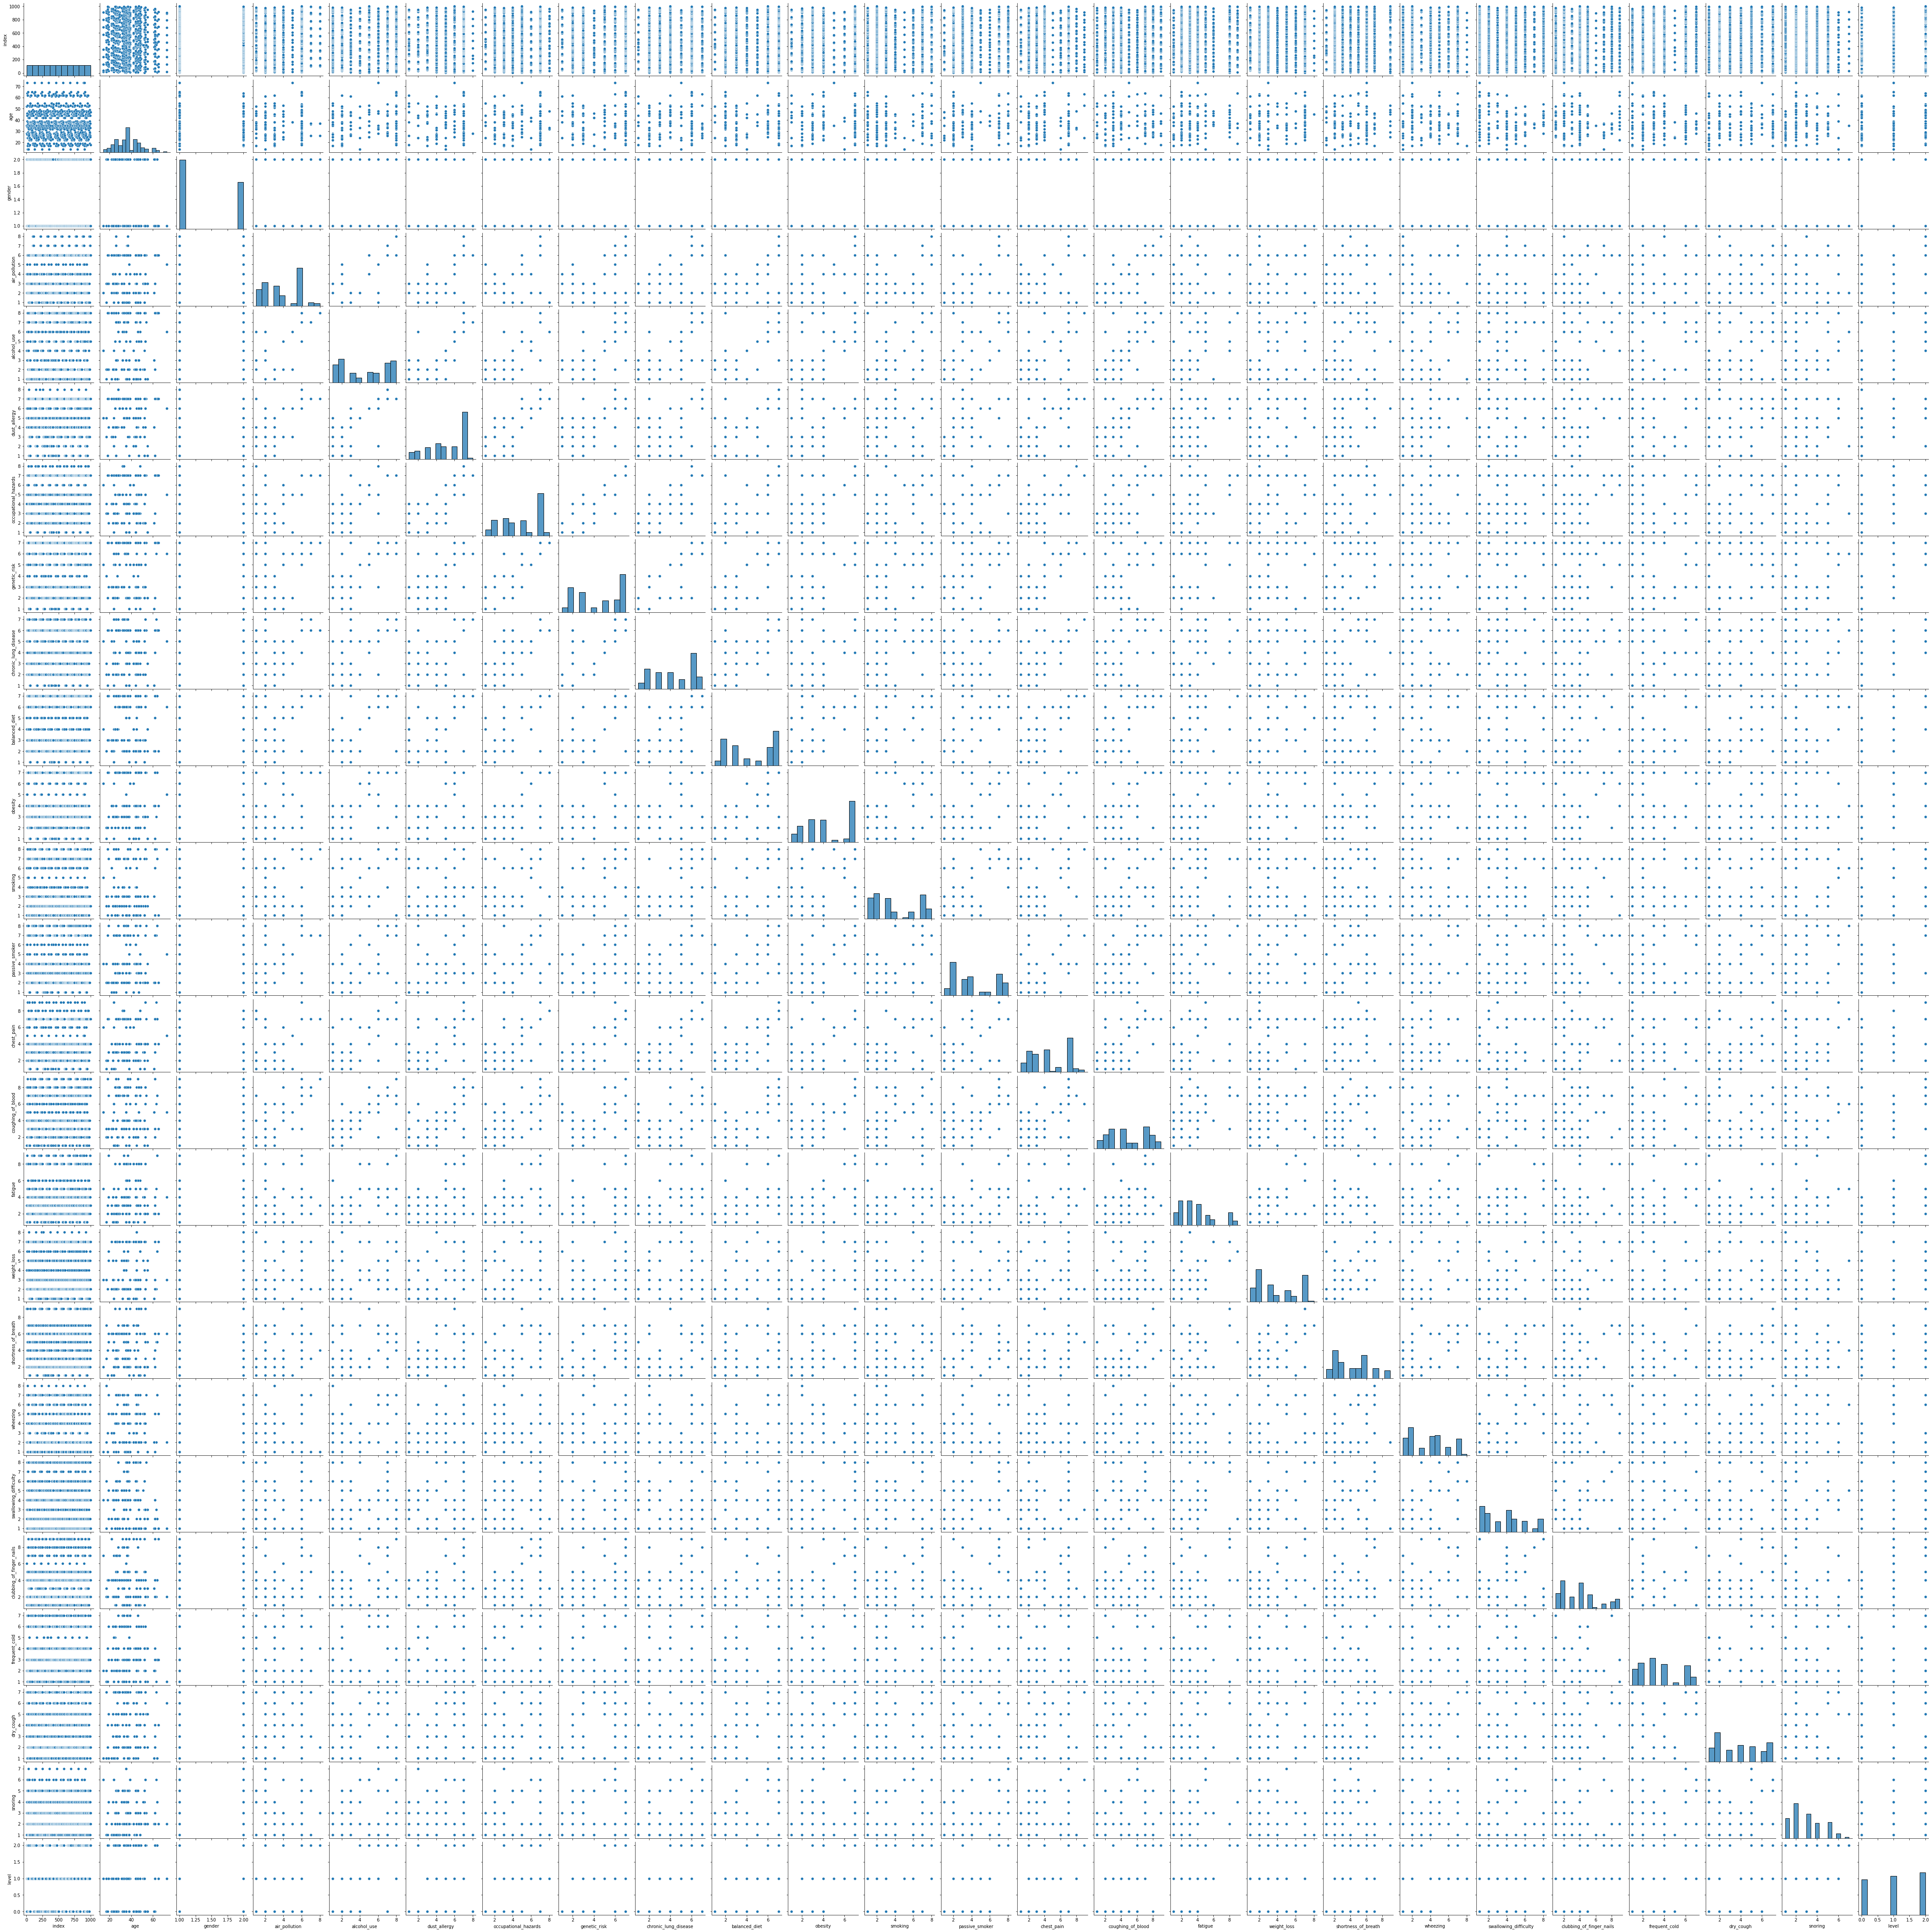

In [ ]:
sns.pairplot(lung[5:])

In [ ]:
# Setting Target
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X = lung.drop(columns='level',axis=1)
y = lung['level']

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
print('Train Shape')
print('X train shape: ', X_train.shape)
print('Y train shape: ', y_train.shape)
print('Test Shape')
print('X test shape: ', X_test.shape)
print('Y test shape: ', y_test.shape)

Train Shape
X train shape:  (800, 24)
Y train shape:  (800,)
Test Shape
X test shape:  (200, 24)
Y test shape:  (200,)


In [ ]:
# Data Scaling using standard scalar
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train.iloc[:,:]=scaler.fit_transform(X_train)
X_test.iloc[:,:]=scaler.transform(X_test)

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=24)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
lr_cm = confusion_matrix(y_test, lr_pred)
lr_cm

array([[56,  0,  0],
       [ 0, 58,  0],
       [ 0,  0, 86]])

In [ ]:
# Test Score
score_lr = lr.score(X_test, y_test)
print('Logistic Regression Score = ',score_lr)

Logistic Regression Score =  1.0


In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print('Classification Report for Logistic Regression\n')
print(classification_report(y_test, lr_pred))

Classification Report for Logistic Regression

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        58
           2       1.00      1.00      1.00        86

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

In [ ]:
# Confusion Matrix
nb_cm = confusion_matrix(y_test, nb_pred)
nb_cm

array([[54,  2,  0],
       [ 0, 50,  8],
       [ 0,  5, 81]])

In [ ]:
# Test Score
score_nb = nb.score(X_test, y_test)
print('Gaussian Naive Bayes Score = ',score_nb)

Gaussian Naive Bayes Score =  0.925


In [ ]:
# Classification Report
print('Classification Report for Gaussian Naive Bayes\n')
print(classification_report(y_test, nb_pred))

Classification Report for Gaussian Naive Bayes

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        56
           1       0.88      0.86      0.87        58
           2       0.91      0.94      0.93        86

    accuracy                           0.93       200
   macro avg       0.93      0.92      0.93       200
weighted avg       0.93      0.93      0.93       200



In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=9)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

In [ ]:
# Confusion Matrix
dt_cm = confusion_matrix(y_test, dt_pred)
dt_cm

array([[56,  0,  0],
       [ 0, 58,  0],
       [ 0,  0, 86]])

In [ ]:
# Test Score
score_dt = dt.score(X_test, y_test)
print('Decision Tree Score = ', score_dt)

Decision Tree Score =  1.0


In [ ]:
# Classification Report
print('Classification Tree for Decision Tree\n')
print(classification_report(y_test, dt_pred))

Classification Tree for Decision Tree

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        58
           2       1.00      1.00      1.00        86

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [ ]:
# All Test Scores
Testscores = pd.Series([score_lr, score_nb, score_dt], 
                        index=['Logistic Regression Score = ', 'Naive Bayes Score = ', 'Decision Tree Score = ']) 
print(Testscores)

Logistic Regression Score =     1.000
Naive Bayes Score =             0.925
Decision Tree Score =           1.000
dtype: float64


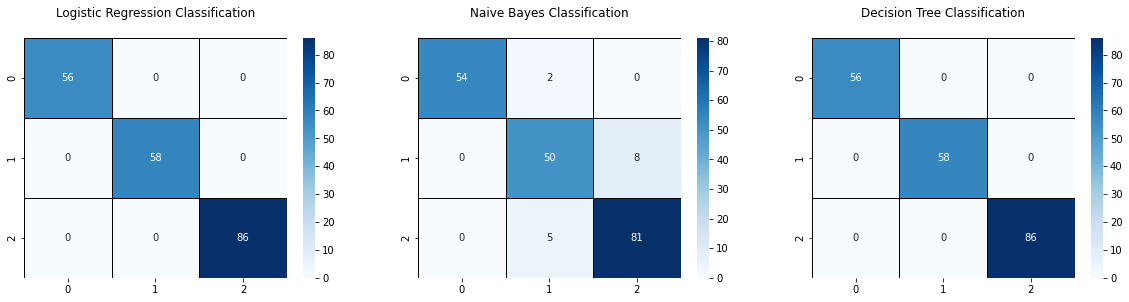

In [ ]:
# All Confusion Matrices
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(3, 3, 1) 
ax1.set_title('Logistic Regression Classification\n') 
ax2 = fig.add_subplot(3, 3, 2)
ax2.set_title('Naive Bayes Classification\n')
ax3 = fig.add_subplot(3, 3, 3)
ax3.set_title('Decision Tree Classification\n')

sns.heatmap(data=lr_cm, annot=True, linewidth=0.7, linecolor='black',cmap="Blues" ,fmt='g', ax=ax1)
sns.heatmap(data=nb_cm, annot=True, linewidth=0.7, linecolor='black',cmap="Blues" ,fmt='g', ax=ax2)
sns.heatmap(data=dt_cm, annot=True, linewidth=0.7, linecolor='black',cmap="Blues" ,fmt='g', ax=ax3)

plt.show()

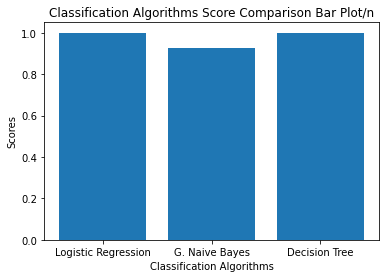

In [ ]:
# Comparison of Algorithms

x=['Logistic Regression', 'G. Naive Bayes', 'Decision Tree']
y = [score_lr, score_nb, score_dt]

plt.bar(x,y)
plt.xlabel('Classification Algorithms')
plt.ylabel("Scores")
plt.title('Classification Algorithms Score Comparison Bar Plot/n')
plt.show()

In [ ]:
# Compare Scores and Find Out The Best Algorithm

al = False
ln = False
ld = False
nd = False

if score_lr == score_nb and score_lr == score_dt and score_nb == score_dt:
    al = True

if score_lr == score_nb:
    ln = True
    
if score_lr == score_dt:
    ld = True
    
if score_nb == score_dt:
    nd = True
      
if al:
    print('\nAll Models Perform The Same\n')
elif ln:
    print('\nLogistic Regression and Gaussian Naive Bayes Performs Better\n')
elif ld:
    print('\nLogistic Regression and Decision Tree Performs Better\n')
elif nd:
    print('\nGaussian Naive Bayes and Decision Tree Performs Better\n')
else:
    if score_lr > score_nb and score_lr > score_dt:
        print('\nLogistic Regression Performs Better\n')
    if score_nb > score_lr and score_nb > score_dt:
        print('\nGaussian Naive Bayes Performs Better\n')
    if score_dt > score_lr and score_dt > score_nb:
        print('\nDecision Tree Performs Better\n')


Logistic Regression and Decision Tree Performs Better



In [ ]:
# Create an empty dataframe that we have to predict 
new_data = pd.DataFrame()

# Create some feature values for this single row
new_data['index'] = [1,2]
new_data['age'] = [30,10]
new_data['gender'] = [1,1]
new_data['air_pollution'] = [5,1]
new_data['alcohol_use'] = [6,0]
new_data['dust_allergy'] = [7,1]
new_data['occupational_hazards'] = [3,1]
new_data['genetic_risk'] = [4,0]
new_data['chronic_lung_disease'] = [6,0]
new_data['balanced_diet'] = [6,0]
new_data['obesity'] = [5,0]
new_data['smoking'] = [5,0]
new_data['passive_smoker'] = [2,0]
new_data['chest_pain'] = [4,2]
new_data['coughing_of_blood'] = [3,0]
new_data['fatigue'] = [4,0]
new_data['weight_loss'] = [4,2]
new_data['shortness_of_breath'] = [4,0]
new_data['wheezing'] = [6,0]
new_data['swallowing_difficulty'] = [2,0]
new_data['clubbing_of_finger_nails'] = [2,0]
new_data['frequent_cold'] = [5,2]
new_data['dry_cough'] = [4,0]
new_data['snoring'] = [5,0]

# View the data 
new_data

,index,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,...,coughing_of_blood,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring
0,1,30,1,5,6,7,3,4,6,6,...,3,4,4,4,6,2,2,5,4,5
1,2,10,1,1,0,1,1,0,0,0,...,0,0,2,0,0,0,0,2,0,0


In [ ]:
lr.predict(new_data)

array([2, 1])

# Logistic regression and decision tree performs better(with accuracy of 99%) than Naive Bayes(with accuracy of 93%). So we have used Logistic regression model to predict severity of lung cancer for a new data